# Math 104A Homework 3
**Name.** <span style="color:red">Kelly Wang</span> <br>
**Id.** <span style="color:red">5351010</span>

## Exercise 1a
From last week's homework, we found out that interpolation by a linear polynomial is $P_1(x) = \frac{x-x_1}{x_0-x_1}f_0 + \frac{x-x_0}{x_1-x_0}$. Since we can look at this problem as a piece-wise linear interpolation from $x_0$ to $x_1$, we can use the subinterval approximation $f$ from lecture. $$p(x) = f(x_j)+\frac{f(x_{j+1}) - f(x_j)}{x_{j+1} - x_j}(x-x_j)$$ For $x \in [x_0, x_1]$. The we have $$f(x)-p(x) = \frac{1}{2}f''(\xi)(x-x_j)(x-x_{j+1})$$ where $\xi$ is any point between $x_j$ and $x_{j+1}$. Given that $|f''(x)| \leq M_2$ for all $x \in [x_0, x_1]$ we have the following $$|f(x) - p(x)| \leq \frac{1}{2}M_2 \underset{x \in [x_0, x_1]}{\max} |(x-x_0)(x-x_1)|$$ From this, the max is attained at the midpoint $(x_0+x_1)/2$ and $$\underset{x\in [x_0, x_1]}{\max}|(x-x_j)(x-x_{j+1})| = (\frac{x_{j+1} - x_j}{2})^2 = \frac{1}{4}h_0^2$$ Here $h_0 = x_1 - x_0$, and since $$\underset{x \in [x_0, x_1]}{\max}|f(x)-P_1(x)| \leq \frac{1}{8}M_2h_0^2$$ we end with $$||f-p_1||_\infty = \underset{x \in [x_0, x_1]}{\max}|f(x)-P_1(x)| \leq \frac{1}{8}(x_0-x_1)M_2$$

## Exercise 1b
Given in part A, we know $|f''(x)| \leq M_2$ and $f''(x) = -sin(x)$ so the maximum error bound for $||f-P_1||_\infty \leq \frac{1}{8}sin(x)(\frac{\pi^2}{4})$, which means the highest error is at 0.30842513753, when $x = \frac{\pi}{2}$, and lowest error is at 0, when $x = 0$. Let $x = \frac{\pi}{4}$ be the real error we have  $||f-P_1||_\infty = 0.21808950623$. Therefore, the real error is within our bound that we used from part A. 

## Exercise 2a
We know that the Lagrange polynomial of degree n is $P_n(x) = \sum_{j= 0}^{n}l_j^n(x)f(x_j)$ where $l_j^n(x) = \Pi_{k=0, k \neq = j}^{n} \frac{x-x_k}{x_j - x_k}$. We also know that the Newton's Form of $P_n(x)$ is $f[x_0]+f[x_0, x_1](x-x_0)+\cdots+f[x_0,\cdots,x_n](x-x_0)\cdots(x-x_{n-1})$. So if the leading coefficients were equal, we could divide both sides by $(x-x_0),\cdots,(x-x_n-1)$ and reach the given equation. 

## Exercise 2b
Suppose $u_0, \cdots, u_n$ is any permutations of $x_0, \cdots, x_n$. Since $f[x_0,\cdots, x_n]$ directly affects the coefficient of the nth interpolating polynomial, $f[x_0,\cdots,x_n]$ is also the coefficient of the nth interpolating polynomial at the same point because interpolation polynomial is unique and the order of the points doesn't matter. So the divided differences are symmetric functions of their arguements. 

## Exercise 3a
In the following cell I will implement the function to find coefficients $c_0, \cdots, c_n$ and to evaluate the corresponding interpolation polynomial given an arbitary arguement x. 

In [14]:
def find(x, arr):
    n = len(arr)
    c = []
    for j in range (0, n):
        c.append(arr[j][1])
    for k in range(1, n):
        for j in range(n-1, k-1, -1):
            c[j] = (c[j] - c[j-1])/(arr[j][0] - arr[j-k][0])
    p = c[n-1]
    for j in range (n-1, -1, -1):
        p = c[j] + (x - arr[j][0])*p
    return p

#Let f(x) = x^3, interpolate this function for x = [0, 4] where we will have 5 nodes. Since we have a polynomial,
#P(1.5) = f(1.5) = 3.375 so if our function performs correctly, it we should get 3.375
arr = [[0,0], [1,1], [2,8], [3,27], [4,64]]
print("When x = 1.5 using Newton's polynomial we get", find(1.5, arr))

When x = 1.5 using Newton's polynomial we get 3.375


## Exercise 3b
In the following cell I will evaluate and plot the error 

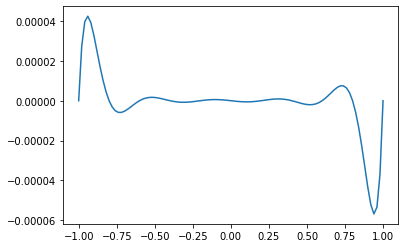

In [15]:
import matplotlib.pyplot as plt
import math
import numpy as np

def f(x):
    return np.exp(-1*x**2)

def node(i):
    return (-1 + i*(2/10))

def point(i):
    return (-1 + i*(2/100))
#find nodes 
pts = []
for i in range(0, 11):
    pts.append([node(i), f(node(i))])
    
#evaluate polynomial 
x  = []
for i in range(0, 101):
    x.append(point(i))

#find error
y = []
for i in range(0, len(x)):
    y.append(f(x[i]) - find(x[i], pts))

#plot
plt.plot(x,y)
plt.show()

## Exercise 4
Given that $P_1(0) = x_0-y_0f^{-1}[y_0,y_1]$, we know that $f[x_0, x_1] = \frac{f(x_1) - f(x_0)}{x_1 - x_0}$ so we just have to flip the ratio for the inverse. Simplify $P_1(0)$ we have $P_1(0) = x_0-y_0 \frac{x_1-x_0}{y_1-y_0}$. Next, we are provided with f(0.5)=−0.106530659712633, f(0.6)= 0.051188363905973 so we know $x_0 =0.5 , x_1=0.6$ and $y_0 = −0.106530659712633, y_1= 0.051188363905973$. Use these values for our $f^{-1}[x_0,x_1]$ we have 0.63403892381. Now let's find an approximate value for the zero $\bar{x}$ of f by evaluating $P_1(0) = x_0-y_0 \frac{x_1-x_0}{y_1-y_0}$. After substituting the values for $x_0, y_0$ and what we just evaluated for $f^{-1}[x_0,x_1]$, we find $0.56754458483$ as our approximate value.

## Exercise 5
To obtain the Hermite polynomial, let's first write the formulate. $$P(x) = f(x_0) + f'(x_0)(x-x_0) +f[x_0,x_0,x_1](x-x_0)^2 + f[x_0, x_0, x_1, x_1](x-x_0)^2(x-x_1)$$ We pretty much have all the values except for a few so let's evaluate the following. 
$$f[x_0, x_0, x_1] = \frac{f[x_0, x_1] - f[x_0, x_0]}{x_1 - x_0}$$ $$f[x_0, x_1] = \frac{f(x_1)-f(x_0)}{x_1-x_0} = \frac{2 - 0}{1-0} = 2$$ We know $f[x_0, x_0] = f'(x_0) = 0$. Substitue the values and we have $f[x_0, x_0, x_1] = 2$.
$$f[x_0, x_0, x_1, x_1] = \frac{f[x_0, x_1, x_1] - f[x_0, x_0, x_1]}{x_1-x_0}$$
$$f[x_0, x_1, x_1] = \frac{f[x_1, x_1] - f[x_0, x_1]}{1}$$ Similarily, $f[x_1,x_1] = f'(x_1) = 3$
$$f[x_0, x_1, x_1] = \frac{3 - 2}{1} = 1$$
$$f[x_0, x_0, x_1, x_1] = \frac{1-2}{1} = -1$$
$$P(x) = 0 + 0(x-x_0)+2(x-x_0)^2-1(x-x_0)^2(x-x_1)$$
$$P(x) = 2x^2-x^2(x-1)$$